<a href="https://colab.research.google.com/github/betterze/StyleSpace/blob/main/StyleSpace_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single channel manipulation in S space

In [ ]:

%tensorflow_version 1.x
!git clone https://github.com/betterze/StyleSpace
% cd StyleSpace


# Select dataset 
If you want to use another dataset, please restart runtime.

In [ ]:
dataset_name='ffhq' #@param ['ffhq', 'car'] {allow-input: true}
# input prepare data 
!python GetCode.py --dataset_name $dataset_name --code_type 'w'
!python GetCode.py --dataset_name $dataset_name --code_type 's'
!python GetCode.py --dataset_name $dataset_name --code_type 's_mean_std'

from PIL import Image
from manipulate import Manipulator
M=Manipulator(dataset_name=dataset_name)

# Single channel annotation


In [ ]:
# (layer index, channel index)

 # StyleGAN2 FFHQ
configs_ffhq = {
    'black hair' :      [(12, 479)],
    'blond hair ':      [(12, 479), (12, 266)],
    'grey hair ' :      [(11, 286)],
    'wavy hair'  :      [(6, 500), (8, 128), (5, 92), (6, 394), (6, 323)],
    'bangs'      :      [(3, 259), (6, 285), (5, 414), (6, 128), (9, 295), (6, 322), (6, 487), (6, 504)],
    'receding hairline':[(5, 414), (6, 322), (6, 497), (6, 504)],
    'smiling'    :      [(6, 501)],
    'lipstick'   :      [(15, 45)],
    'sideburns'  :      [(12, 237)],
    'goatee'     :      [(9, 421)],
    'earrings'   :      [(8, 81)],
    'glasses'    :      [(3, 288), (2, 175), (3, 120), (2, 97)],
    'wear suit'  :      [(9, 441), (8, 292), (11, 358), (6, 223)],
    'gender'     :      [(9, 6)]
}

# StyleGAN2 Car
configs_car = {
    'front'      :      [(8, 411)],
    'headlights' :      [(8, 441), (9, 355)],
    'grill'      :      [(9, 191)],
     'trees'     :      [(9, 108)],
     'grass'     :      [(12, 107)],
     'sky'       :      [(12, 76)],
     
     'hubcap'    :      [(12, 113), (12, 439)],
     'car color' :      [(12, 142), (15, 227)],
     'logo'      :      [(9, 185)],
     'wheel angle':     [8, 420],
}


# choose attribute
To mainipulate an specific attribute, please copy the corresponding (layer index, channel index) from above tables and paste in (lindex,cindex) in the next cell

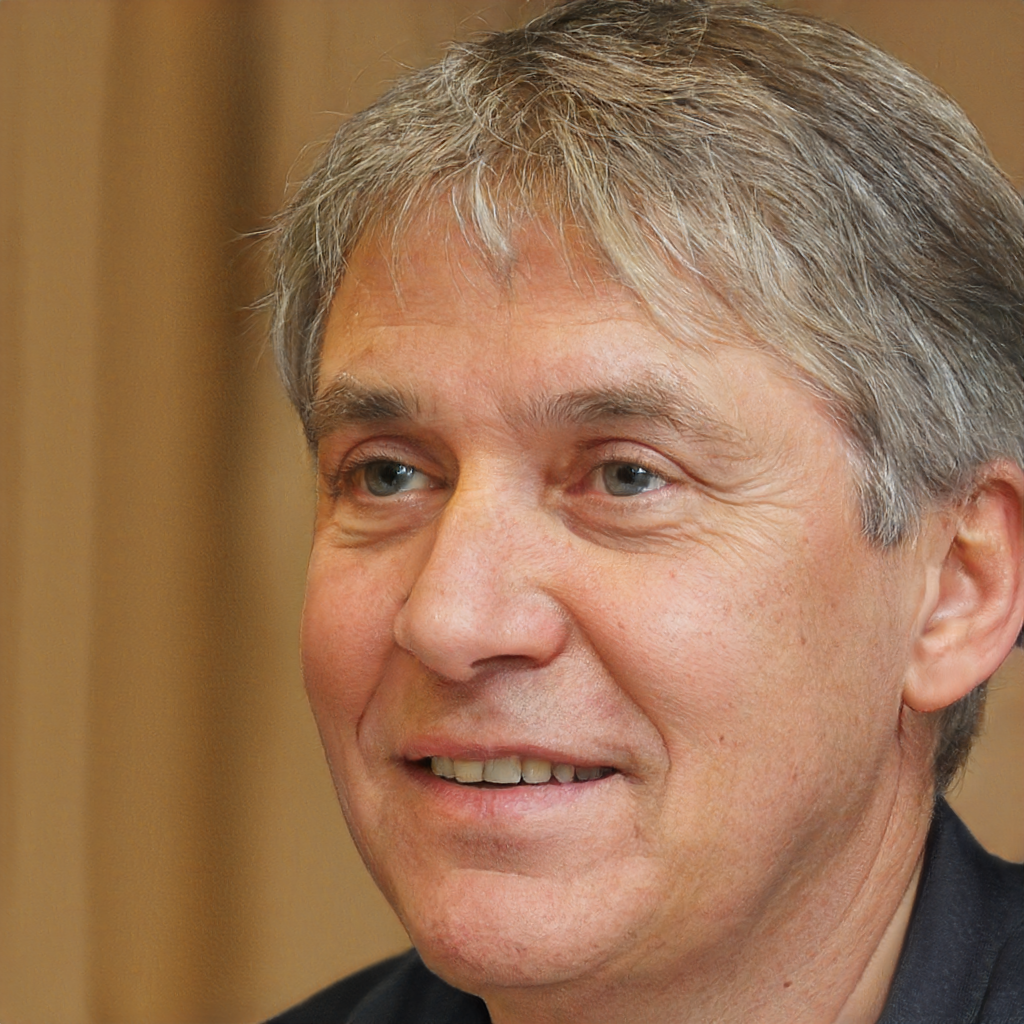

In [ ]:

alpha = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
M.alpha=[alpha] #manipulation strength
M.img_index=1   #index for different images
M.num_images=1  
lindex,cindex=9, 6 #(layer index, channel index), please copy from configs in above

M.manipulate_layers=[lindex]
codes,out=M.EditOneC(cindex)
Image.fromarray(out[0,0])
